## Problem 1. Linear regression

In [166]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:
# Problem 1 supplements: Additional function(s) required for this assignment
def normalize_mv(X, mu=None, sigma=None):
    """
    Normalizes input matrix X.
    If mu and sigma are provided, this function normalizes X using them.
    Otherwise, the function first estimates mu and sigma from X, and then normalizes X.
    Input: X - input matrix
           mu - a vector of column-wise mean values (can be omitted)
           sigma - a vector of column-wise standard deviation values (can be omitted)
    Output: 
    """
    if mu is None and sigma is None:
        mu = X.mean(axis=0)
        sigma = X.std(axis=0)
    return (X - mu)/sigma, mu, sigma


def get_rmse(y_true, y_pred):
    """
    Measures the regression error using root-mean-square error (RMSE)
    Input: Y_true - true output (ground truth)
           Y_pred - predicted output
    return a floating point number representing RMSE
    """
    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean((y_true - y_pred)**2)) 

In [168]:
# Problem 1 supplements: Data preparation for Problem 1.
# load data
data_tr = np.genfromtxt('boston_houses_train.csv', delimiter=',', skip_header=1)
data_ts = np.genfromtxt('boston_houses_test.csv', delimiter=',', skip_header=1)

# normalization
X_tr, mu_tr, sigma_tr = normalize_mv(data_tr[:, :-1])
y_tr = data_tr[:, -1].astype(np.float64)
X_ts, _, _ = normalize_mv(data_ts[:, :-1], mu_tr, sigma_tr)
y_ts = data_ts[:, -1].astype(np.float64)

print(X_tr.shape)
print(y_tr.shape)
print(X_ts.shape)
print(y_ts.shape)

(456, 21)
(456,)
(50, 21)
(50,)


In [169]:
# Problem 1 (a) - Implement compute_cost()
def compute_cost(X, y, w):
    """
    compute_cost (= compute the error function J(w,D))
    Input: X - Input attributes
           y - Target values
           w - model weights
    Output: cost computed given (X, y) and w (i.e., evaluation of function J())
    """
    
    # TODO: Complete this function
    m=X.shape[0] #N
    J = (1/m) * np.sum((y - X.dot(w))**2)
    return J

In [170]:
# Problem 1 (a) - Your compute_cost() should work with the following functions
def gradient_descent(X, y, w, alpha, n_iters, threshold=1e-07):
    """
    gradient_descent
    Input: X, y, w, alpha, n_iters
    Output: 
    """
    N = len(y)
    log_j = []
    j_last = np.Inf

    for i in range(n_iters):
        w_new = w - (-2*alpha/N * X.T @ (y - X @ w))
        j_new = compute_cost(X, y, w)
        
        if np.abs(j_last - j_new) < threshold:
            break
            # "j_last - j_new < threshold" is preferred for the sentinel
            # Here np.abs() is used for educational purpose
            
        w = w_new
        log_j.append(j_new)
        j_last = j_new

    return w, log_j
    

def train_linreg(X_tr, y_tr, alpha=0.01, n_iters=1500):
    """
    train_linreg
    Input: X_tr - Training input attributes
           y_tr - Training target values
           alpha - learning rate alpha (default: 0.01)
           n_iters - number of iterations (default: 1500)
    Output: w_star - trained model weights
            log_j - cost history
    """
    N_tr, d_tr = X_tr.shape
    
    X_tr_b = np.hstack((X_tr, np.ones((N_tr, 1)))) # adding a bias term at the far right of the matrix
    w_init = np.zeros(d_tr + 1)  # np.random.rand(d_tr + 1)
    
    initial_cost = compute_cost(X_tr_b, y_tr, w_init)
    print("Initial J(w_init, D_tr) is: ", initial_cost, "\n")
    
    w_star, log_j = gradient_descent(X_tr_b, y_tr, w_init, alpha, n_iters)
    
    print("w*: \n", w_star, "\n")
    print("J(w*, D_tr): ", log_j[-1])
    
    return w_star, log_j

Initial J(w_init, D_tr) is:  601.1605263157894 

w*: 
 [-0.98423976  0.9789124   0.19501163  0.87777439 -0.78209369  1.05873945
 -0.09628398 -3.04293934  2.14854721 -1.55106407 -1.89858986  0.85519071
 -3.47077153  0.17586123  0.24059276 -0.64204962  1.05874273 -0.09680907
 -0.47352301  1.06483885 -0.09673251 22.69649123] 

J(w*, D_tr):  21.786880042225043


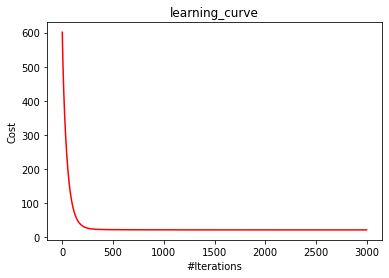

In [171]:
# Problem 1 (b) Execute this code cell, after implementing compute_cost(X, y, w)

Model_linreg, log_j_linreg = train_linreg(X_tr, y_tr, 0.005, 3000)

plt.plot(range(len(log_j_linreg)), log_j_linreg, 'r')
plt.title('learning_curve')
plt.ylabel('Cost')
plt.xlabel('#Iterations')
plt.show()

In [172]:
# Problem 1 (c) Implement the predict_linreg(X, w) below.
def predict_linreg(X, w):
    """
    predict_linreg
    Input: X - Input attributes to predict the target output
           w - Trained model weights
    Output: y_pred - predicted target values
    """
    
    # TODO: Complete this function
    b = w[-1]
    w = np.delete(w, 21, axis=0)
    # X = np.delete(X, 21, axis=0)
    y_pred = np.dot(X,w)
    return y_pred + b

4.66763967930312
5.002223099284747


(-10.0, 55.0)

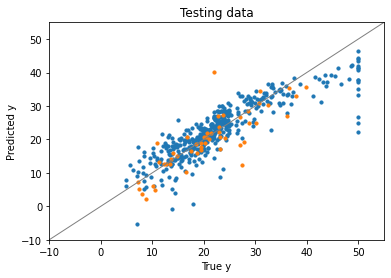

In [173]:
# Problem 1 (d)
# prediction
y_tr_pred = predict_linreg(X_tr, Model_linreg)
y_ts_pred = predict_linreg(X_ts, Model_linreg)

# print out the results
print(get_rmse(y_tr, y_tr_pred))
print(get_rmse(y_ts, y_ts_pred))

# Draw scatter plots that compare true and predicted target values
# (blue dots for y_tr; oranges dots for y_ts)
plt.scatter(y_tr,y_tr_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Training data')

plt.scatter(y_ts,y_ts_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Testing data')

plt.axline((-100, -100), (100, 100), c='grey', lw=1)
plt.ylim(-10, 55)
plt.xlim(-10, 55)

Initial J(w_init, D_tr) is:  601.1605263157894 

w*: 
 [ 8.21848366e+00 -2.70064795e+00 -1.52113346e+00 -4.24350636e-01
 -2.17427843e+00 -8.28643184e-01  1.13332642e+00 -5.05326849e-01
 -3.23869812e+00  6.10350456e-01 -4.26322316e-01 -2.41003851e-01
  1.80220783e+00 -3.47964065e+00  7.19130235e-02  1.34852003e-01
 -8.73585298e-01  1.13750328e+00 -5.05322771e-01 -7.97573869e-01
  1.15882805e+00 -5.05889638e-01  1.05300091e-01  3.52608349e-01
  5.79980957e-01  1.33277057e+00 -6.51394929e-02  2.65192500e-01
 -2.39437761e-01  5.64695797e-01  8.79733869e-02  5.45610448e-01
  9.39869913e-02 -1.64651094e-01  1.10650531e+00  2.28700424e-01
 -1.13295080e-01 -1.70403412e-01  2.62599384e-01 -2.39779991e-01
 -2.78694385e-01  2.75060831e-01 -2.39595994e-01 -1.21496484e-01
 -6.34748050e-01  2.82169543e-03 -2.12592232e-01  3.83518534e-02
 -1.35200766e-01 -2.99378046e-01  2.33357869e-01  7.73194671e-01
  7.97420260e-02  4.33642761e-01 -5.54108264e-01  4.88220087e-02
 -7.37916826e-02 -3.19080541e-01  3

(-10.0, 55.0)

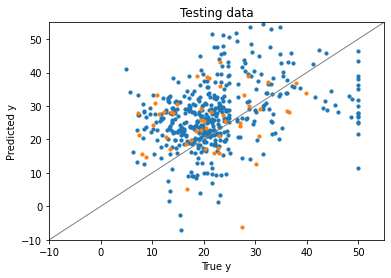

In [174]:
# Problem 1 (e)
from sklearn.preprocessing import PolynomialFeatures # use this lib

# TODO: Apply the polynomial feature function
#       and create X_tr_ext from X_tr, and
#                  X_ts_ext from X_ts

poly_features = PolynomialFeatures(degree=2)
X_tr_ext = poly_features.fit_transform(X_tr)
X_ts_ext = poly_features.fit_transform(X_ts)

""" You do NOT need to modify the rest of the code cell """

# training
Model_linreg, log_j_linreg = train_linreg(X_tr_ext, y_tr, 0.005, 3000)

# prediction
y_tr_pred_ext = predict_linreg(X_tr_ext, Model_linreg)
y_ts_pred_ext = predict_linreg(X_ts_ext, Model_linreg)

print(get_rmse(y_tr, y_tr_pred_ext))
print(get_rmse(y_ts, y_ts_pred_ext))

# drawing a scatter plot of prediction
plt.scatter(y_tr,y_tr_pred_ext, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Training data')

plt.scatter(y_ts,y_ts_pred_ext, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Testing data')

plt.axline((-100, -100), (100, 100), c='grey', lw=1)
plt.ylim(-10, 55)
plt.xlim(-10, 55)

Initial J(w_init, D_tr) is:  117.44980280701755 

w*: 
 [-1.14810984  0.83170389 -0.22201332  0.7312099  -0.92328985  0.89555882
 -0.17916889 -3.95731701  2.12289209 -1.3803993  -2.13620594  0.52692848
 -3.79886326  0.07165848  0.13105842 -0.79769532  0.89885841 -0.17946455
 -0.64637258  0.89237032 -0.17942927 22.55538373] 

J(w*, D_tr):  0.004539879811583844


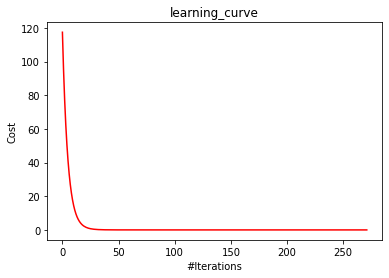

4.730453716264633
4.829538400992167


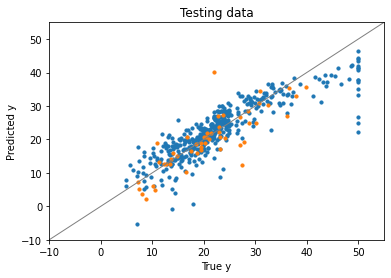

In [175]:
# Problem 1 (g, h)
def compute_cost_l2(X, y, w, l):
    """
    compute_cost_l2 L2-regularized cost function (= compute the error function J_l2(w,D))
    Input: X - Input attributes
           y - Target values
           w - model weights
    Output: cost computed given (X, y) and w (i.e., evaluation of function J())
    """
    # TODO: Complete this function
    m=X.shape[0] # N
    J = (1/m) * (l/2) * (np.sum(y - X.dot(w))**2)
    return J


def gradient_descent_l2(X, y, w, l, alpha, n_iters, threshold=1e-07):
    """
    gradient_descent
    Input: X, y, w, alpha, n_iters
    Output: 
    """
    N = len(y)
    log_j = []
    j_last = np.Inf

    for i in range(n_iters):
        w_new = w - (-2*alpha/N * X.T @ (y - X @ w) + l*w.sum())
        
        j_new = compute_cost_l2(X, y, w, l)
        
        if np.abs(j_last - j_new) < threshold:
            break
            # "j_last - j_new < threshold" is preferred for the sentinel
            # Here np.abs() is used for educational purpose

            
        w = w_new
        log_j.append(j_new)
        j_last = j_new

    return w, log_j


def train_linreg_l2(X_tr, y_tr, l=1.0, alpha=0.01, n_iters=3000):
    """
    train_linreg
    Input: X_tr - Training input attributes
           y_tr - Training target values
           l - regularization parameter lambda (default: 1.0)
           alpha - learning rate alpha (default: 0.01)
           n_iters - number of iterations (default: 1500)
    Output: w_star - trained model weights
            log_j - cost history
    """
    N_tr, d_tr = X_tr.shape
    
    X_tr_b = np.hstack((X_tr, np.ones((N_tr, 1)))) # adding a bias term at the far right of the matrix
    w_init = np.zeros(d_tr + 1)  # np.random.rand(d_tr + 1)
    
    initial_cost = compute_cost_l2(X_tr_b, y_tr, w_init, l)
    print("Initial J(w_init, D_tr) is: ", initial_cost, "\n")
    
    w_star, log_j = gradient_descent_l2(X_tr_b, y_tr, w_init, l, alpha, n_iters)
    
    print("w*: \n", w_star, "\n")
    print("J(w*, D_tr): ", log_j[-1])
    
    return w_star, log_j


# Training a L2-regularized LinReg
Model_l2, log_j_l2 = train_linreg_l2(X_tr, y_tr, 0.001, 0.05, 3000)

plt.plot(range(len(log_j_l2)), log_j_l2, 'r')
plt.title('learning_curve')
plt.ylabel('Cost')
plt.xlabel('#Iterations')
plt.show()

# prediction
y_tr_pred_l2 = predict_linreg(X_tr, Model_l2)
y_ts_pred_l2 = predict_linreg(X_ts, Model_l2)

print(get_rmse(y_tr, y_tr_pred_l2))
print(get_rmse(y_ts, y_ts_pred_l2))

# drawing a scatter plot of prediction
plt.scatter(y_tr,y_tr_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Training data')

plt.scatter(y_ts,y_ts_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Testing data')

plt.axline((-100, -100), (100, 100), c='grey', lw=1)
plt.ylim(-10, 55)
plt.xlim(-10, 55)
plt.show()


In [176]:
def compute_r2(y_true, y_pred):
    """
    compute_r2 (= compute R^2 (coefficient of determination) between two input vectors)
    Input: X - Input attributes
           y - Target values
           w - model weights
    Output: cost computed given (X, y) and w (i.e., evaluation of function J())
    """
    
    # TODO: Complete this function
    r2 = 0
    r2 = (1 - y_true/y_pred)**2
    return r2

def compute_rmse(y_true, y_pred):
    """
    compute_rmse (= compute the root mean squared error between two input vectors)
    Input: y_true - Input attributes
           y - Target values
           w - model weights
    Output: cost computed given (X, y) and w (i.e., evaluation of function J())
    """
    
    # TODO: Complete this function
    rmse = 0
    assert len(y_true) == len(y_pred)
    rmse =  np.sqrt(np.mean((y_true - y_pred)**2)) 
    return rmse

print('R2:')
print(compute_r2(y_ts, y_ts_pred))
print(compute_r2(y_ts, y_ts_pred_ext))
print(compute_r2(y_ts, y_ts_pred_l2))

print('RMSE:')
print(compute_rmse(y_ts, y_ts_pred))
print(compute_rmse(y_ts, y_ts_pred_ext))
print(compute_rmse(y_ts, y_ts_pred_l2))

R2:
[2.29859916e-02 7.26493345e-04 2.27204969e-01 3.55172942e-01
 1.28733263e-02 3.84820379e-03 1.14348724e-03 1.16550867e-02
 2.19134937e-02 2.33304492e-04 1.36778431e-02 1.14652413e-01
 2.08313338e-02 5.76738342e-03 1.06198657e-02 9.62351475e-04
 2.52419074e-02 1.21695356e-04 7.59757670e-04 1.38621390e+00
 1.87228871e-01 4.30030390e-01 1.02444542e-04 1.34919336e-02
 5.56675565e-05 5.74736234e-03 5.86703273e-04 7.70628436e-04
 1.63796135e-02 1.24558427e+00 2.29802258e-03 2.35139259e-03
 5.41413524e-04 1.65223191e-04 4.03447245e-03 1.18440569e-05
 2.26743818e-04 4.70075325e-03 3.31207253e-02 2.79930564e-02
 4.19688568e-02 3.54205239e-02 2.07729009e-01 1.46998600e+00
 1.77441338e-01 2.25003065e-02 7.75087655e-04 8.42031754e+00
 2.10629892e-01 1.22392655e-01]
[2.14906424e-03 1.90498511e-01 1.67099466e-02 1.37922095e-02
 2.16261774e-01 1.48280789e-02 4.64189030e-02 5.77136275e-02
 2.07756219e-02 1.68464435e-02 3.12428323e-02 7.62524096e-02
 8.42354155e-04 1.61348736e-02 4.24249346e-03 8.4

In [177]:
# Problem 1 (j) - Perform a 5-fold crossvalidation
#                 to find the best hyperparameter combination
for i in range(5):
    X_train = X
    y_train = y
    


NameError: name 'X' is not defined